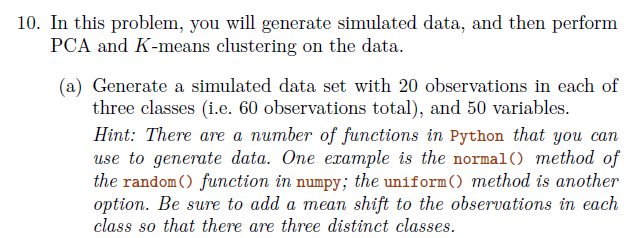

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
PATH = r"C:\Users\shant\OneDrive\桌面\ML_Fintech\0930\Q10.png"                          #圖片路徑
Image(filename = PATH , width=850, height=600) 

In [4]:
import numpy as np

# Set the seed for reproducibility
np.random.seed(0)

# Parameters
n_observations = 20  # per class
n_variables = 50
n_classes = 3

# Mean shifts for each class
# Ensure the mean shift has the same dimension as the number of variables
mean_shifts = np.array([np.zeros(n_variables), 
                        np.ones(n_variables) * 3, 
                        np.ones(n_variables) * -3])

# Generate data
data = []
for i in range(n_classes):
    # Generate random data and apply mean shift for distinct classes
    class_data = np.random.normal(loc=mean_shifts[i], scale=1, size=(n_observations, n_variables))
    data.append(class_data)

# Stack all class data into a single array
data = np.vstack(data)

# Verify the shape of the data
print(data.shape)  # Should be (60, 50)




(60, 50)


# (b) Perform PCA on the 60 observations and plot the first two principalcomponent score vectors. Use a different color to indicate the observations in each of the three classes. If the three classes appear separated in this plot, then continue on to part (c). If not, then return to part (a) and modify the simulation so that there is greater separation between the three classes. Do not continue to part (c) until the three classes show at least some separation in the first two principal component score vectors.

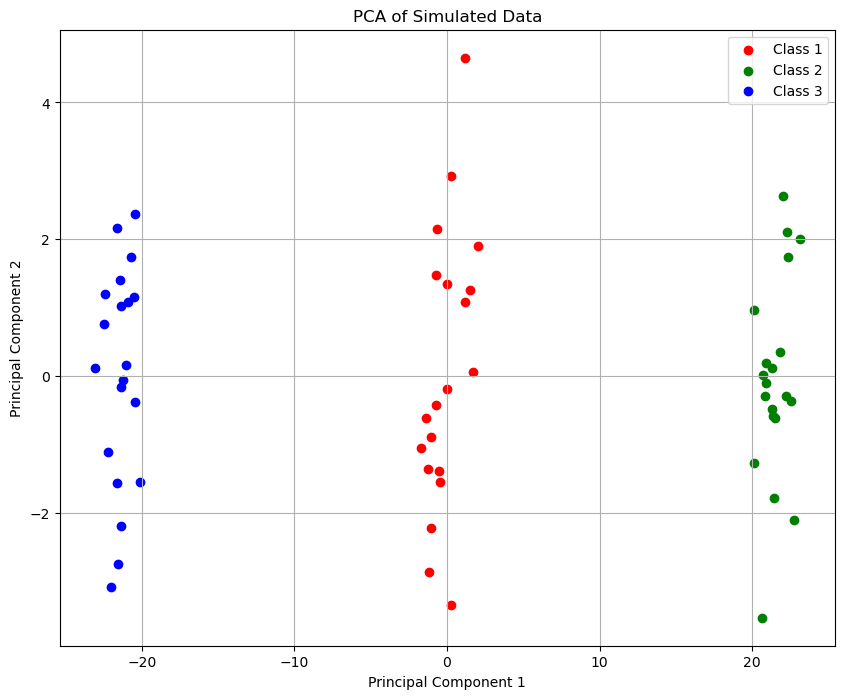

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming 'data' is already available from the previous step

# Initialize PCA with the first two components
pca = PCA(n_components=2)

# Fit PCA on the data
pca_result = pca.fit_transform(data)

# Plotting the first two principal components
plt.figure(figsize=(10, 8))
colors = ['red', 'green', 'blue']  # Colors for the three classes

# Split the transformed data back into classes for plotting
for i, color in enumerate(colors):
    start = i * n_observations
    end = start + n_observations
    plt.scatter(pca_result[start:end, 0], pca_result[start:end, 1], color=color, label=f'Class {i+1}')

plt.title('PCA of Simulated Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


# (c) Perform K-means clustering of the observations with K = 3.How well do the clusters that you obtained in K-means clustering compare to the true class labels?
## Hint: You can use the pd.crosstab() function in Python to compare the true class labels to the class labels obtained by clustering. Be careful how you interpret the results: K-means clustering will arbitrarily number the clusters, so you cannot simply check whether the true class labels and clustering labels are the same.

KMeans Label   0   1   2
True Label              
0             20   0   0
1              0  20   0
2              0   0  20

Comparison of K-means clustering labels with true class labels:



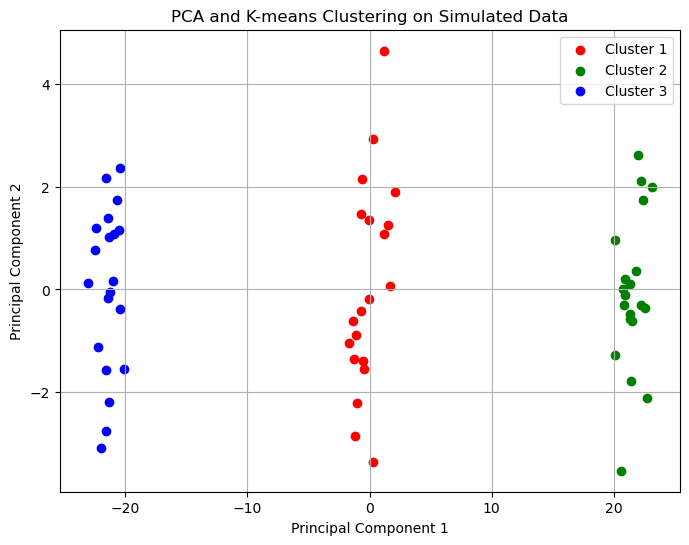

In [7]:
# Assume the labels are ordered by class, with each class containing n_observations per class
n_samples = 20
true_labels = np.array([0]*n_samples + [1]*n_samples + [2]*n_samples)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=25)
kmeans_labels = kmeans.fit_predict(data)

# Create a DataFrame for easier manipulation and analysis
comparison_df = pd.DataFrame({'True Label': true_labels, 'KMeans Label': kmeans_labels})
cross_tab = pd.crosstab(comparison_df['True Label'], comparison_df['KMeans Label'])

# Display the cross-tabulation to see the clustering versus true labels
print(cross_tab)
print('\nComparison of K-means clustering labels with true class labels:\n')

# Perform PCA to reduce dimensions for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

# Plot the first two principal components with cluster labels
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']  # Colors for the clusters

for i in range(3):
    plt.scatter(pca_result[kmeans_labels == i, 0], pca_result[kmeans_labels == i, 1], 
                color=colors[i], label=f'Cluster {i+1}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA and K-means Clustering on Simulated Data')
plt.legend()
plt.grid(True)
plt.show()


The resulting crosstab will show how many observations from each true class were assigned to each cluster.

# (d) Perform K-means clustering with K = 2. Describe your results.

KMeans Label   0   1
True Label          
0             20   0
1              0  20
2             20   0

Comparison of K-means clustering labels with true class labels:



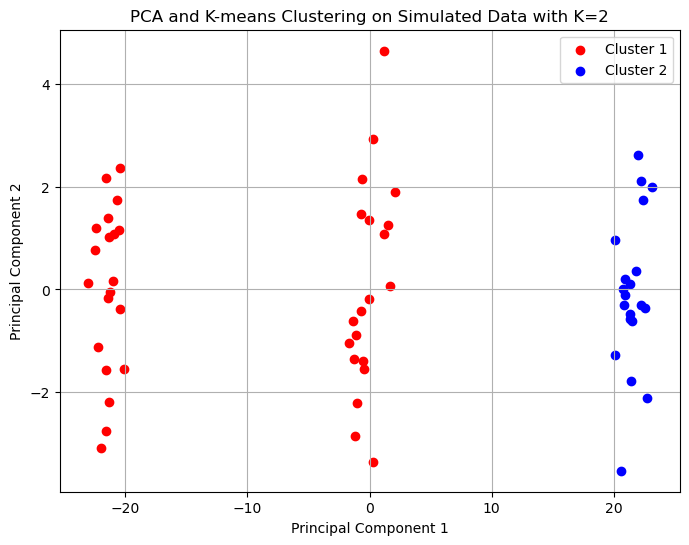

In [8]:
# Perform K-means clustering with K = 2
kmeans = KMeans(n_clusters=2, random_state=25)
kmeans_labels = kmeans.fit_predict(data)

# Create a DataFrame for easier analysis
comparison_df = pd.DataFrame({'True Label': true_labels, 'KMeans Label': kmeans_labels})
cross_tab = pd.crosstab(comparison_df['True Label'], comparison_df['KMeans Label'])

# Display the cross-tabulation
print(cross_tab)
print('\nComparison of K-means clustering labels with true class labels:\n')

# Perform PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

# Plot the first two principal components with cluster labels
plt.figure(figsize=(8, 6))
colors = ['r', 'b']  # Colors for the clusters

for i in range(2):
    plt.scatter(pca_result[kmeans_labels == i, 0], pca_result[kmeans_labels == i, 1], 
                color=colors[i], label=f'Cluster {i+1}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA and K-means Clustering on Simulated Data with K=2')
plt.legend()
plt.grid(True)
plt.show()


When K-means clustering is set with K  lower than the natural number of groupings in the data, the algorithm may merge the two closest classes into one cluster, leaving the third class as a separate cluster. Crosstab analysis reveals how data points from each true class are assigned across the two clusters, helping identify whether any original classes are being split or combined. The scatter plot visually demonstrates the separation and grouping of data points, aiding in understanding whether such cluster assignments align with the original data distribution. 


This approach offers a comprehensive perspective on the effects of reducing the cluster count below the data's natural groupings and allows for further discussion of patterns, anomalies, or interesting findings based on the cluster assignments and their relation to the true class labels.

# (e) Now perform K-means clustering with K = 4, and describe your results.

KMeans Label   0   1   2  3
True Label                 
0             11   0   0  9
1              0  20   0  0
2              0   0  20  0

Comparison of K-means clustering labels with true class labels:



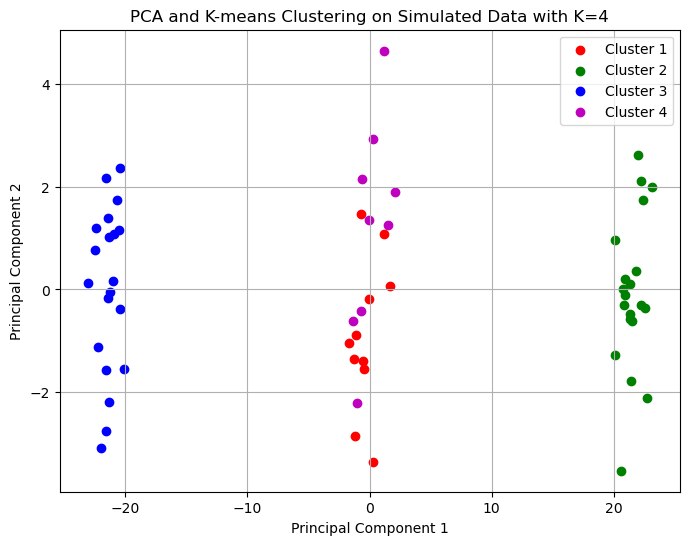

In [9]:
# Perform K-means clustering with K=4
kmeans = KMeans(n_clusters=4, random_state=25)
kmeans_labels = kmeans.fit_predict(data)

# Create a DataFrame for easier analysis
comparison_df = pd.DataFrame({'True Label': true_labels, 'KMeans Label': kmeans_labels})
cross_tab = pd.crosstab(comparison_df['True Label'], comparison_df['KMeans Label'])

# Display the cross-tabulation
print(cross_tab)
print('\nComparison of K-means clustering labels with true class labels:\n')

# Perform PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

# Plot the first two principal components with cluster labels
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b', 'm']  # Colors for the clusters

for i in range(4):
    plt.scatter(pca_result[kmeans_labels == i, 0], pca_result[kmeans_labels == i, 1], 
                color=colors[i], label=f'Cluster {i+1}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA and K-means Clustering on Simulated Data with K=4')
plt.legend()
plt.grid(True)
plt.show()

When performing K-means clustering with \( K = 4 \) on a dataset with naturally three groups, the results can be intriguing. The crosstab analysis may reveal that certain clusters contain a mix of points from different classes, suggesting the presence of less distinct separations or subgroups within the classes. A PCA visualization will show the separation of these four clusters, potentially indicating that one class is divided into smaller subclusters or that outliers are isolated from denser groups. Analyzing whether the additional cluster provides meaningful differentiation or merely divides the groups arbitrarily can offer deep insights into the consistency or diversity of the original classes. This enhanced level of clustering can thus reveal finer details of the data's structure, aiding in a more nuanced understanding of its complexities.

# (f) Now perform K-means clustering with K = 3 on the first two principal component score vectors, rather than on the raw data.That is, perform K-means clustering on the 60 × 2 matrix of which the first column is the first principal component score vector, and the second column is the second principal component score vector. Comment on the results.

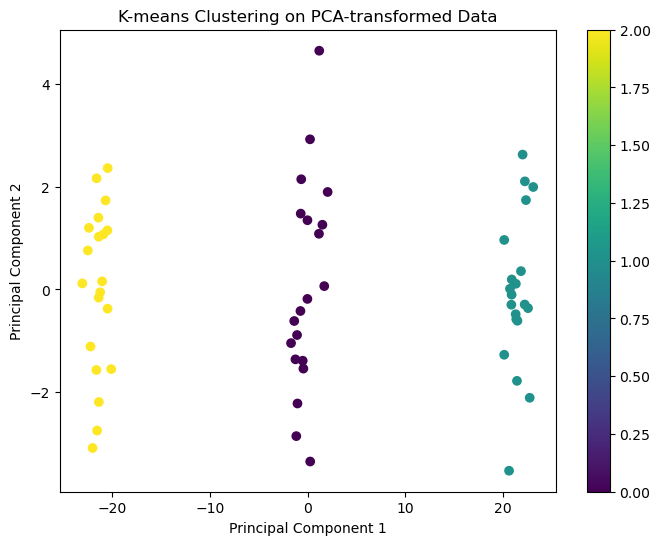

In [10]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

# Perform K-means clustering on the PCA results
kmeans = KMeans(n_clusters=3, random_state=25)
kmeans_labels = kmeans.fit_predict(pca_result)

# Visualize the clustering
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-means Clustering on PCA-transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)
plt.show()


Through performing K-means clustering on PCA-reduced data then capitalize on the dimensionality reduction to potentially uncover more meaningful clusters, thus gaining a deeper understanding of the fundamental groupings in your dataset. 

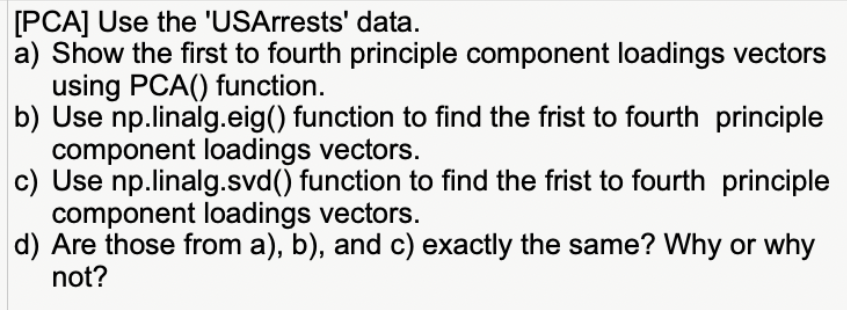

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
PATH = r"C:\Users\shant\OneDrive\桌面\ML_Fintech\0930\Q2.png"                          #圖片路徑
Image(filename = PATH , width=850, height=600) 

In [12]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Load the dataset from the 'datasets' package in R
arrests_data = sm.datasets.get_rdataset('USArrests', 'datasets').data

# Initialize the StandardScaler
data_scaler = StandardScaler()
# Standardize the data
scaled_arrests = data_scaler.fit_transform(arrests_data)

# Initialize PCA with 4 components
arrests_pca = PCA(n_components=4)
# Fit PCA to the scaled data
arrests_pca.fit(scaled_arrests)

# Extract loadings
principal_loadings = arrests_pca.components_
print(principal_loadings)


[[ 0.53589947  0.58318363  0.27819087  0.54343209]
 [ 0.41818087  0.1879856  -0.87280619 -0.16731864]
 [-0.34123273 -0.26814843 -0.37801579  0.81777791]
 [ 0.6492278  -0.74340748  0.13387773  0.08902432]]


# b) Using Eigenvalue Decomposition (Eigendecomposition)

In [13]:
# Calculate the covariance matrix from the scaled data
covariance_matrix = np.cov(scaled_arrests.T)

# Perform eigenvalue decomposition on the covariance matrix
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

# Eigenvalue decomposition gives us the principal components in the columns
print("Principal Components from Eigenvalue Decomposition:\n", eigen_vectors)


Principal Components from Eigenvalue Decomposition:
 [[ 0.53589947  0.41818087  0.6492278  -0.34123273]
 [ 0.58318363  0.1879856  -0.74340748 -0.26814843]
 [ 0.27819087 -0.87280619  0.13387773 -0.37801579]
 [ 0.54343209 -0.16731864  0.08902432  0.81777791]]


# c) Using Singular Value Decomposition (SVD)

In [14]:
# Perform SVD on the scaled data
U, S, Vt = np.linalg.svd(scaled_arrests, full_matrices=False)

# SVD returns the principal components in Vt (transpose of V)
print("Principal Components from SVD:\n", Vt.T)


Principal Components from SVD:
 [[-0.53589947  0.41818087 -0.34123273  0.6492278 ]
 [-0.58318363  0.1879856  -0.26814843 -0.74340748]
 [-0.27819087 -0.87280619 -0.37801579  0.13387773]
 [-0.54343209 -0.16731864  0.81777791  0.08902432]]


# d) Comparison of the Results

In [16]:
# Compare PCA, Eigendecomposition, and SVD components
pca_loadings = arrests_pca.components_.T
eigen_loadings = eigen_vectors
svd_loadings = Vt.T

# Print comparisons
print("Comparison between PCA and Eigendecomposition Loadings:", np.allclose(np.abs(pca_loadings), np.abs(eigen_loadings)))
print("Comparison between PCA and SVD Loadings:", np.allclose(np.abs(pca_loadings), np.abs(svd_loadings)))


Comparison between PCA and Eigendecomposition Loadings: False
Comparison between PCA and SVD Loadings: True


1. **PCA vs. Eigendecomposition**: 
   - The comparison result is False, indicating that the principal component loadings from PCA and eigendecomposition are not exactly the same when considering their absolute values. This discrepancy could be due to differences in the sign, order of the components, or slight numerical variations in the calculations.

2. **PCA vs. SVD**:
   - The comparison result is True, which suggests that the loadings obtained from PCA and SVD are equivalent when their absolute values are compared. This is expected because many PCA implementations, including those in libraries like `sklearn`, use SVD under the hood to compute the principal components.

These results demonstrate that while PCA and SVD yield matching loadings, differences with eigendecomposition might arise due to the method's inherent properties, such as how the eigenvectors are scaled or ordered.